<a href="https://colab.research.google.com/github/VatsalBabel/AutoEncoders-vs-PCA/blob/main/autoencoders_vs_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
original_df = pd.read_csv('/content/gdrive/My Drive/My Projects/Agile Analysis/Algos/agile_wc.csv')

In [4]:
original_df.head(10)

,Effort,Vi,D,V,Sprint Size,Work days,Team Salary,Act Time
0,156,4.2,0.687,2.7,10,22,230000,63
1,202,3.7,0.701,2.5,10,21,260000,92
2,173,4.0,0.878,3.3,10,22,250000,56
3,331,4.5,0.886,3.8,10,22,300000,86
4,124,4.9,0.903,4.2,10,22,300000,32
5,339,4.1,0.903,3.6,10,22,400000,91
6,97,4.2,0.859,3.4,10,22,250000,35
7,257,3.8,0.833,3.0,10,22,250000,93
8,84,3.9,0.646,2.4,10,22,190000,36
9,211,4.6,0.758,3.2,10,22,250000,62


In [5]:
mms = MinMaxScaler()
mms.fit(original_df)
original_df = pd.DataFrame(mms.transform(original_df), columns=original_df.columns)

In [6]:
original_df.head(10)

,Effort,Vi,D,V,Sprint Size,Work days,Team Salary,Act Time
0,0.339350,0.416667,0.159533,0.166667,0.0,1.0,0.190476,0.461538
1,0.505415,0.000000,0.214008,0.055556,0.0,0.0,0.333333,0.780220
2,0.400722,0.250000,0.902724,0.500000,0.0,1.0,0.285714,0.384615
3,0.971119,0.666667,0.933852,0.777778,0.0,1.0,0.523810,0.714286
4,0.223827,1.000000,1.000000,1.000000,0.0,1.0,0.523810,0.120879
5,1.000000,0.333333,1.000000,0.666667,0.0,1.0,1.000000,0.769231
6,0.126354,0.416667,0.828794,0.555556,0.0,1.0,0.285714,0.153846
7,0.703971,0.083333,0.727626,0.333333,0.0,1.0,0.285714,0.791209
8,0.079422,0.166667,0.000000,0.000000,0.0,1.0,0.000000,0.164835
9,0.537906,0.750000,0.435798,0.444444,0.0,1.0,0.285714,0.450549


In [7]:
for column_name in original_df.columns:
  if len(original_df[column_name].unique())==1 or column_name.count('Work')>0:
    original_df.drop(column_name, inplace=True, axis=1)

In [8]:
original_df.head()

,Effort,Vi,D,V,Team Salary,Act Time
0,0.339350,0.416667,0.159533,0.166667,0.190476,0.461538
1,0.505415,0.000000,0.214008,0.055556,0.333333,0.780220
2,0.400722,0.250000,0.902724,0.500000,0.285714,0.384615
3,0.971119,0.666667,0.933852,0.777778,0.523810,0.714286
4,0.223827,1.000000,1.000000,1.000000,0.523810,0.120879


In [9]:
input = Input(shape=6, name='input')
a1 = Dense(7, activation='relu', name='a1')(input)
a2 = Dense(6, activation='relu', name='a2')(a1)
a6 = Dense(4, activation='relu', name='a6')(a2)
a3 = Dense(4, activation='relu', name='a3')(a6)
a4 = Dense(7, activation='relu', name='a4')(a3)
a5 = Dense(6, name='a5')(a4)

In [10]:
model = Model(inputs=[input], outputs=[a3, a5])

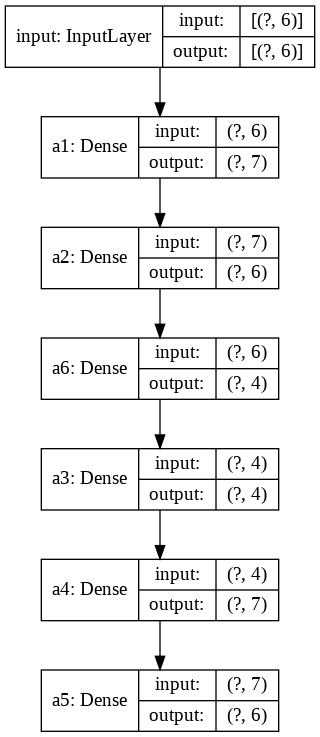

In [11]:
plot_model(model, show_shapes=True)

In [12]:
model.compile(optimizer='adam', loss='mae')

In [ ]:
model.fit({'input':original_df.values}, {'a5':original_df.values}, batch_size=1, epochs=5000)

In [26]:
autoencoder_compressed, autoencoder_decompressed = model.predict(original_df.values)

In [27]:
autoencoder_decompressed = pd.DataFrame(autoencoder_decompressed, columns=original_df.columns)
autoencoder_compressed = pd.DataFrame(autoencoder_compressed)
autoencoder_compressed

,0,1,2,3
0,0.209272,0.488463,0.790613,0.000000
1,0.750553,0.000000,1.035919,0.404424
2,0.383101,0.806855,1.259567,1.019924
3,0.975344,1.372639,2.006399,0.631817
4,0.000000,1.874099,1.287356,0.784263
5,1.102204,1.053892,1.984958,0.931869
6,0.000000,1.008672,0.838798,0.964828
7,0.855112,0.457426,1.430096,0.753038
8,0.000000,0.105213,0.000000,0.101819
9,0.349108,1.079756,1.238242,0.054233


In [28]:
#Check to remove any sparse columns from our compressed dataframes
autoencoder_compressed = autoencoder_compressed.drop([x for x in autoencoder_compressed.columns if autoencoder_compressed[x].sum()==0], axis=1)

In [31]:
print(original_df.shape, autoencoder_compressed.shape)

(21, 6) (21, 4)


In [33]:
#So we have compressed our complete dataframe of 6 dimensions to 4 dimensions
#Now lets check the results with PCA

In [34]:
pca = PCA(n_components=4)
pca_reduced = pd.DataFrame(pca.fit_transform(original_df))
pca_decompressed = pd.DataFrame(pca.inverse_transform(pca_reduced), columns=original_df.columns)

In [35]:
autoencoder_compressed.head()

,0,1,2,3
0,0.209272,0.488463,0.790613,0.000000
1,0.750553,0.000000,1.035919,0.404424
2,0.383101,0.806855,1.259567,1.019924
3,0.975344,1.372639,2.006399,0.631817
4,0.000000,1.874099,1.287356,0.784263


In [36]:
pca_reduced.head()

,0,1,2,3
0,-0.209623,-0.183572,0.330337,0.028716
1,-0.093452,-0.650509,0.023039,0.100107
2,0.224970,0.157625,-0.290633,-0.105311
3,0.990981,0.031771,0.053111,-0.144867
4,0.595884,0.951333,0.138110,0.026758


In [37]:
autoencoder_decompressed.head()

,Effort,Vi,D,V,Team Salary,Act Time
0,0.345270,0.416537,0.163850,0.162219,0.190159,0.467719
1,0.487075,-0.002082,0.259241,0.052538,0.334357,0.784481
2,0.424652,0.235486,0.834138,0.503967,0.395407,0.364000
3,0.967467,0.655634,0.955856,0.744982,0.514410,0.732271
4,0.235195,1.004507,1.009962,0.939291,0.507264,0.149494


In [38]:
pca_decompressed.head()

,Effort,Vi,D,V,Team Salary,Act Time
0,0.349578,0.414587,0.156210,0.168796,0.188741,0.452366
1,0.574543,0.003546,0.215844,0.028336,0.324503,0.716514
2,0.417319,0.236359,0.883160,0.527720,0.281208,0.370727
3,0.895863,0.682268,0.958718,0.761409,0.536627,0.781750
4,0.288378,1.010000,1.010947,0.958773,0.516665,0.060743


In [39]:
original_df.head()

,Effort,Vi,D,V,Team Salary,Act Time
0,0.339350,0.416667,0.159533,0.166667,0.190476,0.461538
1,0.505415,0.000000,0.214008,0.055556,0.333333,0.780220
2,0.400722,0.250000,0.902724,0.500000,0.285714,0.384615
3,0.971119,0.666667,0.933852,0.777778,0.523810,0.714286
4,0.223827,1.000000,1.000000,1.000000,0.523810,0.120879
